In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('diabetes10.csv')

df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
df= df.sample(frac=1, random_state=42).reset_index(drop=True)
split_idx = int(0.8 * len(df))

# Split the data
train_df, test_df = np.split(df, [split_idx])

## Data Cleaning

In [7]:
train_df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [8]:
train_df.dropna(inplace=True)

In [11]:
train_df.duplicated().sum()

np.int64(0)

In [12]:
train_df.drop_duplicates(inplace=True)

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185448 entries, 0 to 202943
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       185448 non-null  float64
 1   HighBP                185448 non-null  float64
 2   HighChol              185448 non-null  float64
 3   CholCheck             185448 non-null  float64
 4   BMI                   185448 non-null  float64
 5   Smoker                185448 non-null  float64
 6   Stroke                185448 non-null  float64
 7   HeartDiseaseorAttack  185448 non-null  float64
 8   PhysActivity          185448 non-null  float64
 9   Fruits                185448 non-null  float64
 10  Veggies               185448 non-null  float64
 11  HvyAlcoholConsump     185448 non-null  float64
 12  AnyHealthcare         185448 non-null  float64
 13  NoDocbcCost           185448 non-null  float64
 14  GenHlth               185448 non-null  float64
 15  MentH

In [14]:
for feature in train_df.columns:
  print(len(train_df[feature].unique()) ,'  ', feature)
  if (len(train_df[feature].unique()) == 2 ) and (feature !='Diabetes_binary'):
    train_df[feature] = train_df[feature].astype(bool)

2    Diabetes_binary
2    HighBP
2    HighChol
2    CholCheck
82    BMI
2    Smoker
2    Stroke
2    HeartDiseaseorAttack
2    PhysActivity
2    Fruits
2    Veggies
2    HvyAlcoholConsump
2    AnyHealthcare
2    NoDocbcCost
5    GenHlth
31    MentHlth
31    PhysHlth
2    DiffWalk
2    Sex
13    Age
6    Education
8    Income


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185448 entries, 0 to 202943
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       185448 non-null  float64
 1   HighBP                185448 non-null  bool   
 2   HighChol              185448 non-null  bool   
 3   CholCheck             185448 non-null  bool   
 4   BMI                   185448 non-null  float64
 5   Smoker                185448 non-null  bool   
 6   Stroke                185448 non-null  bool   
 7   HeartDiseaseorAttack  185448 non-null  bool   
 8   PhysActivity          185448 non-null  bool   
 9   Fruits                185448 non-null  bool   
 10  Veggies               185448 non-null  bool   
 11  HvyAlcoholConsump     185448 non-null  bool   
 12  AnyHealthcare         185448 non-null  bool   
 13  NoDocbcCost           185448 non-null  bool   
 14  GenHlth               185448 non-null  float64
 15  MentH

In [16]:
train_df = train_df.rename(columns = {'Diabetes_binary':'Diabetes'})

## EDA

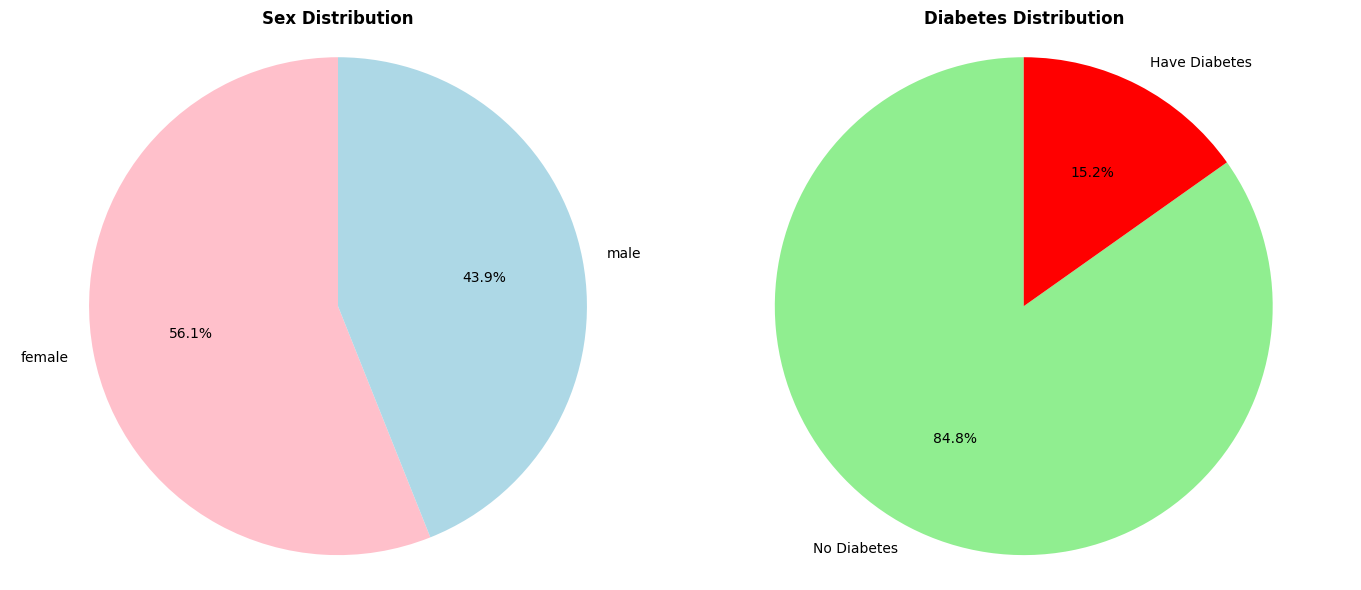

In [47]:
# Count occurrences for Sex and Diabetes columns
sex_counts = train_df['Sex'].value_counts()
diabetes_counts = train_df['Diabetes'].value_counts()

# Create subplots for better layout
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart for Sex
axes[0].pie(sex_counts, labels=['female', 'male'], autopct='%1.1f%%', startangle=90, colors=['pink', 'lightblue'])
axes[0].set_title('Sex Distribution', fontweight='bold')
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Pie chart for Diabetes
axes[1].pie(diabetes_counts, labels=['No Diabetes', 'Have Diabetes'], autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'red'])
axes[1].set_title('Diabetes Distribution', fontweight='bold')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust layout
plt.tight_layout()
plt.show()

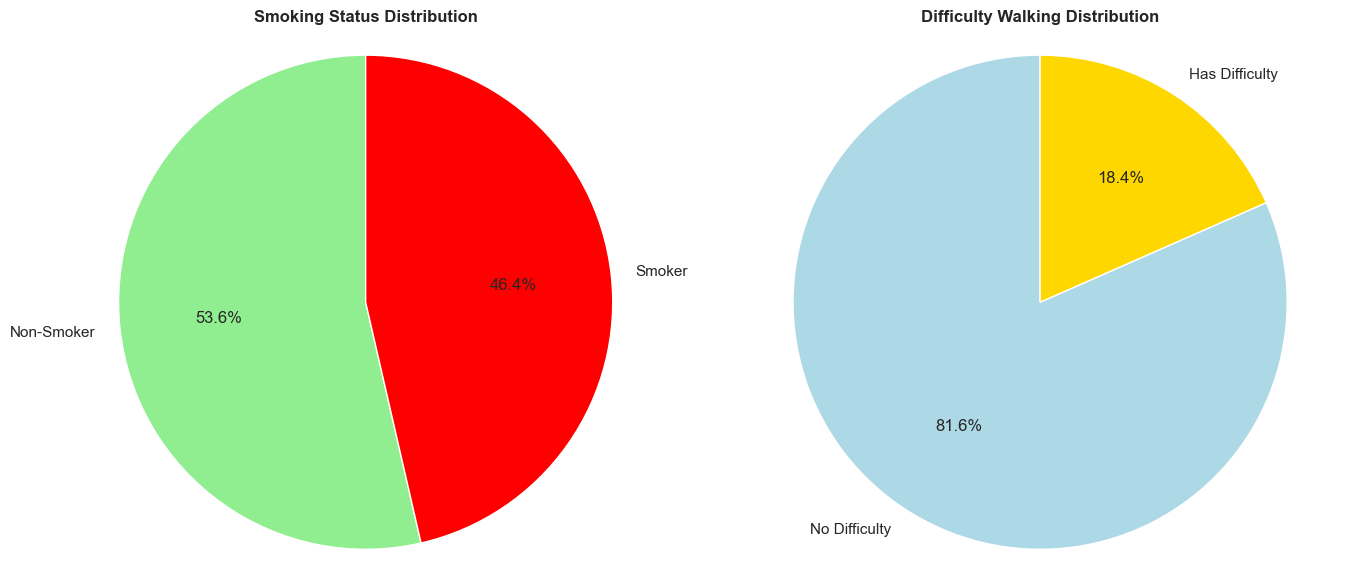

In [59]:
# Count occurrences
smoker_counts = train_df['Smoker'].value_counts()
diffwalk_counts = train_df['DiffWalk'].value_counts()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart for Smoker
axes[0].pie(
    smoker_counts,
    labels=['Non-Smoker', 'Smoker'],  # 0: Non-smoker, 1: Smoker
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightgreen', 'red']
)
axes[0].set_title('Smoking Status Distribution', fontweight='bold')
axes[0].axis('equal')

# Pie chart for Difficulty Walking
axes[1].pie(
    diffwalk_counts,
    labels=['No Difficulty', 'Has Difficulty'],  # 0: No, 1: Yes
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightblue', 'gold']
)
axes[1].set_title('Difficulty Walking Distribution', fontweight='bold')
axes[1].axis('equal')

# Adjust layout
plt.tight_layout()
plt.show()

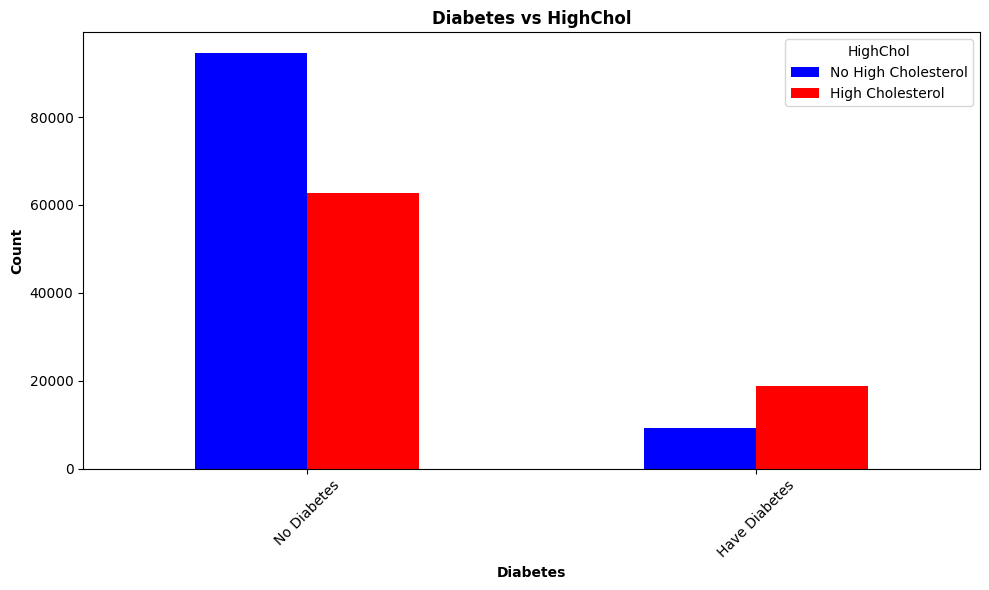

In [ ]:
# Create a contingency table for Diabetes and HighChol
matrix = pd.crosstab(train_df['Diabetes'], train_df['HighChol'])

# Visualize the contingency table using a grouped bar chart
matrix.plot(kind='bar', figsize=(10, 6), color=['blue', 'red'])

# Add labels and title
plt.title('Diabetes vs HighChol', fontweight='bold')
plt.xlabel('Diabetes', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xticks(ticks=range(len(matrix.index)), labels=['No Diabetes', 'Have Diabetes'], rotation=45)
plt.legend(title='HighChol', labels=['No High Cholesterol', 'High Cholesterol'])

# Show the plot
plt.tight_layout()
plt.show()

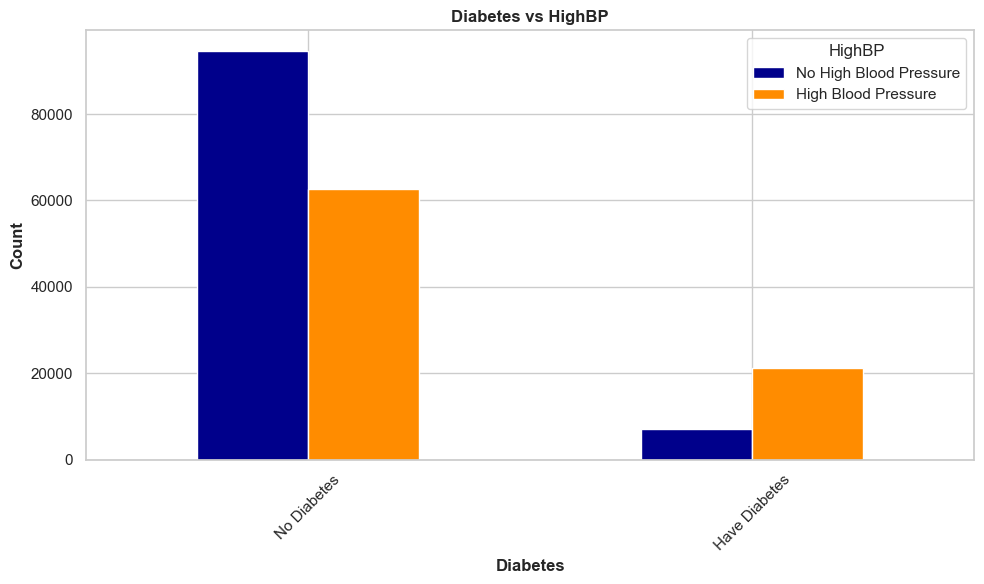

In [69]:
# Create a contingency table for Diabetes and HighBP
matrix = pd.crosstab(train_df['Diabetes'], train_df['HighBP'])

# Visualize the contingency table using a grouped bar chart
matrix.plot(kind='bar', figsize=(10, 6), color=['darkBlue', 'darkOrange'])

# Add labels and title
plt.title('Diabetes vs HighBP', fontweight='bold')
plt.xlabel('Diabetes', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xticks(ticks=range(len(matrix.index)), labels=['No Diabetes', 'Have Diabetes'], rotation=45)
plt.legend(title='HighBP', labels=['No High Blood Pressure', 'High Blood Pressure'])

# Show the plot
plt.tight_layout()
plt.show()

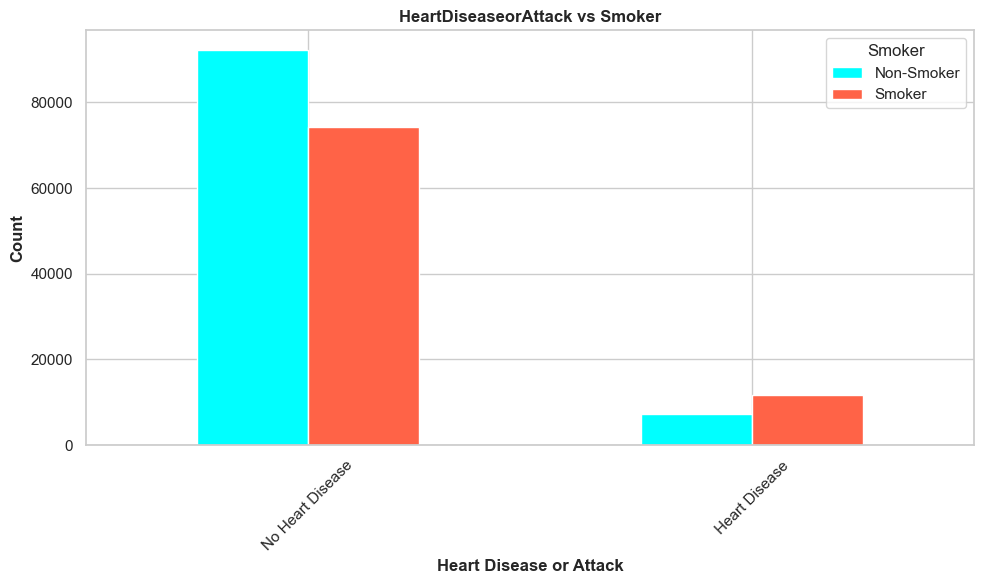

In [67]:
# Create a contingency table for HeartDiseaseorAttack and Smoker
heart_smoker_matrix = pd.crosstab(train_df['HeartDiseaseorAttack'], train_df['Smoker'])

# Visualize the contingency table using a grouped bar chart
heart_smoker_matrix.plot(kind='bar', figsize=(10, 6), color=['Aqua', 'Tomato'])

# Add labels and title
plt.title('HeartDiseaseorAttack vs Smoker', fontweight='bold')
plt.xlabel('Heart Disease or Attack', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xticks(ticks=range(len(heart_smoker_matrix.index)), labels=['No Heart Disease', 'Heart Disease'], rotation=45)
plt.legend(title='Smoker', labels=['Non-Smoker', 'Smoker'])

# Show the plot
plt.tight_layout()
plt.show()

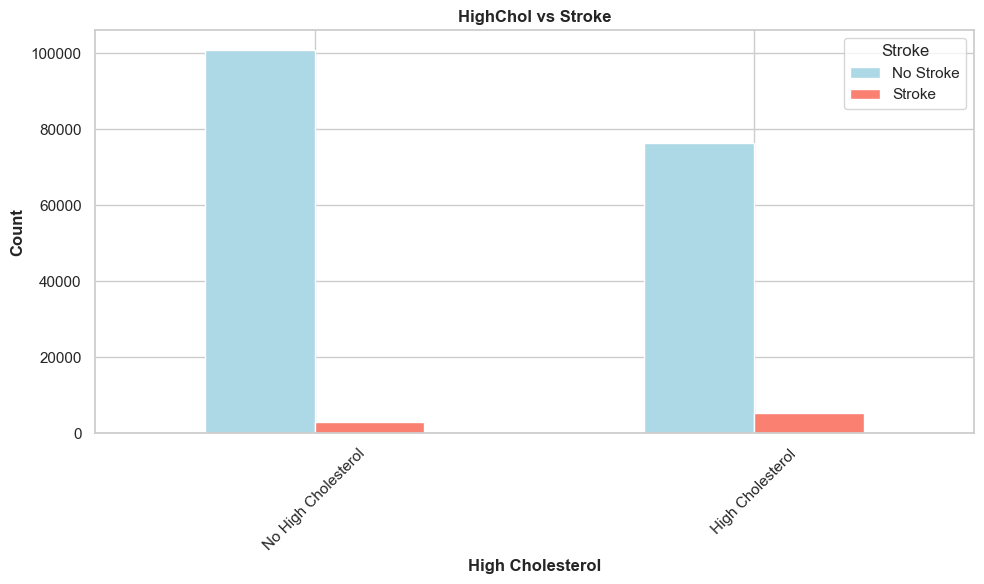

In [68]:
# Create a contingency table for HighChol and Stroke
chol_stroke_matrix = pd.crosstab(train_df['HighChol'], train_df['Stroke'])

# Visualize the contingency table using a grouped bar chart
chol_stroke_matrix.plot(kind='bar', figsize=(10, 6), color=['lightblue', 'salmon'])

# Add labels and title
plt.title('HighChol vs Stroke', fontweight='bold')
plt.xlabel('High Cholesterol', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xticks(ticks=range(len(chol_stroke_matrix.index)), labels=['No High Cholesterol', 'High Cholesterol'], rotation=45)
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])

# Show the plot
plt.tight_layout()
plt.show()

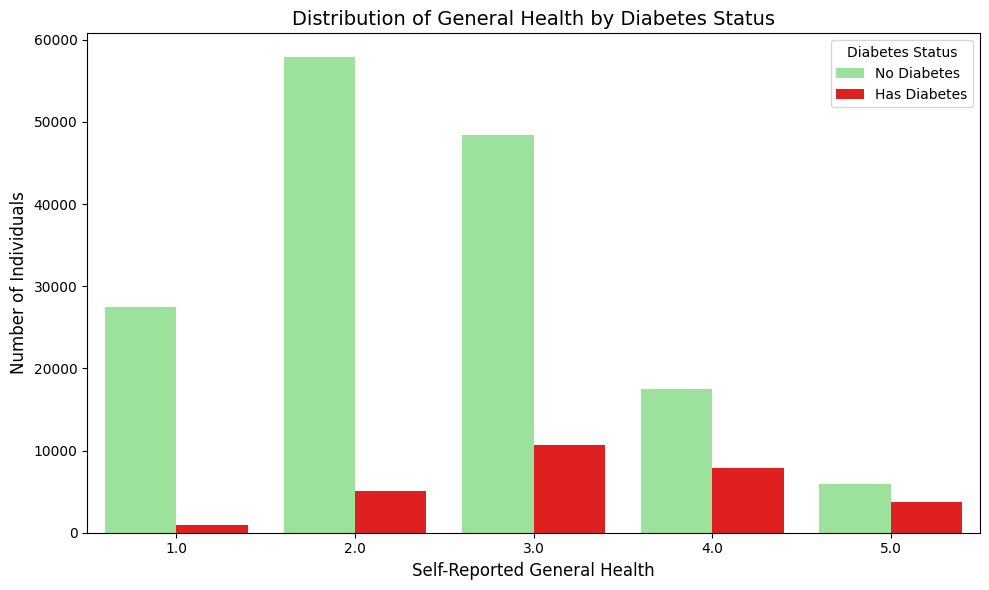

In [54]:
plt.figure(figsize=(10, 6))
sns.countplot(
    x=train_df['GenHlth'],
    hue=train_df['Diabetes'],
    palette={0: 'lightgreen', 1: 'red'}
)

plt.title('Distribution of General Health by Diabetes Status', fontsize=14)
plt.xlabel('Self-Reported General Health', fontsize=12)
plt.ylabel('Number of Individuals', fontsize=12)
plt.legend(title='Diabetes Status', labels=['No Diabetes', 'Has Diabetes'])
plt.tight_layout()
plt.show()

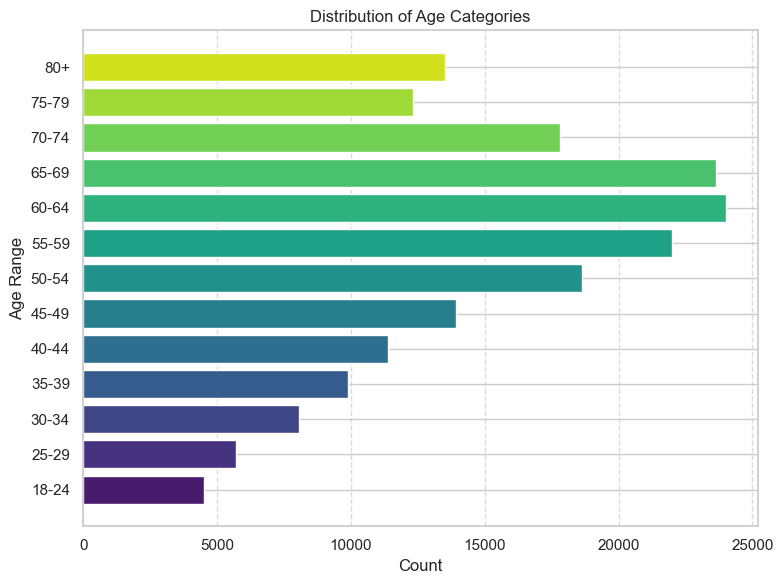

In [73]:
# Mapping from code to age range
age_mapping = {
    1: '18-24',
    2: '25-29',
    3: '30-34',
    4: '35-39',
    5: '40-44',
    6: '45-49',
    7: '50-54',
    8: '55-59',
    9: '60-64',
    10: '65-69',
    11: '70-74',
    12: '75-79',
    13: '80+'
}

# Count and map age values
age_counts = train_df['Age'].value_counts().sort_index()
age_labels = [age_mapping.get(int(code), str(code)) for code in age_counts.index]

# Use seaborn color palette
colors = sns.color_palette("viridis", len(age_labels))

# Create horizontal bar plot
plt.figure(figsize=(8, 6))
plt.barh(age_labels, age_counts.values, color=colors)
plt.xlabel('Count')
plt.ylabel('Age Range')
plt.title('Distribution of Age Categories')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

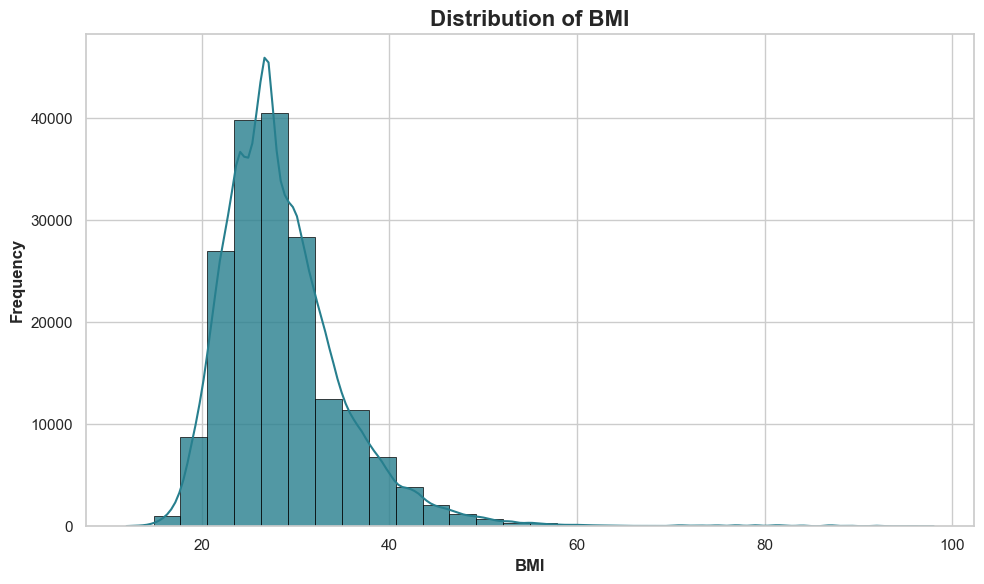

In [90]:
# Set a prettier style and palette
sns.set(style="whitegrid")
palette_color = sns.color_palette("viridis")[2]

plt.figure(figsize=(10, 6))
sns.histplot(
    train_df['BMI'],
    kde=True,
    bins=30,
    color=palette_color,
    edgecolor='black',
    linewidth=0.5,
    alpha=0.8
)

plt.title('Distribution of BMI', fontweight='bold', fontsize=16)
plt.xlabel('BMI', fontweight='bold', fontsize=12)
plt.ylabel('Frequency', fontweight='bold', fontsize=12)
plt.tight_layout()
plt.show()

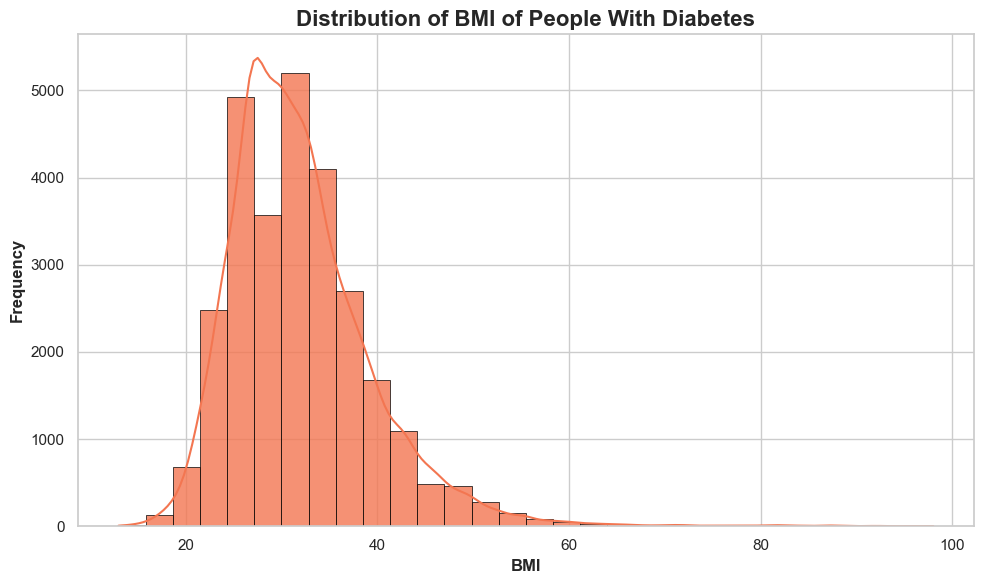

In [100]:
# Set a prettier style and palette
sns.set(style="whitegrid")
palette_color = sns.color_palette("rocket")[4]

plt.figure(figsize=(10, 6))
sns.histplot(
    train_df.loc[train_df['Diabetes'] == 1, 'BMI'],
    kde=True,
    bins=30,
    color=palette_color,
    edgecolor='black',
    linewidth=0.5,
    alpha=0.8
)

plt.title('Distribution of BMI of People With Diabetes', fontweight='bold', fontsize=16)
plt.xlabel('BMI', fontweight='bold', fontsize=12)
plt.ylabel('Frequency', fontweight='bold', fontsize=12)
plt.tight_layout()
plt.show()

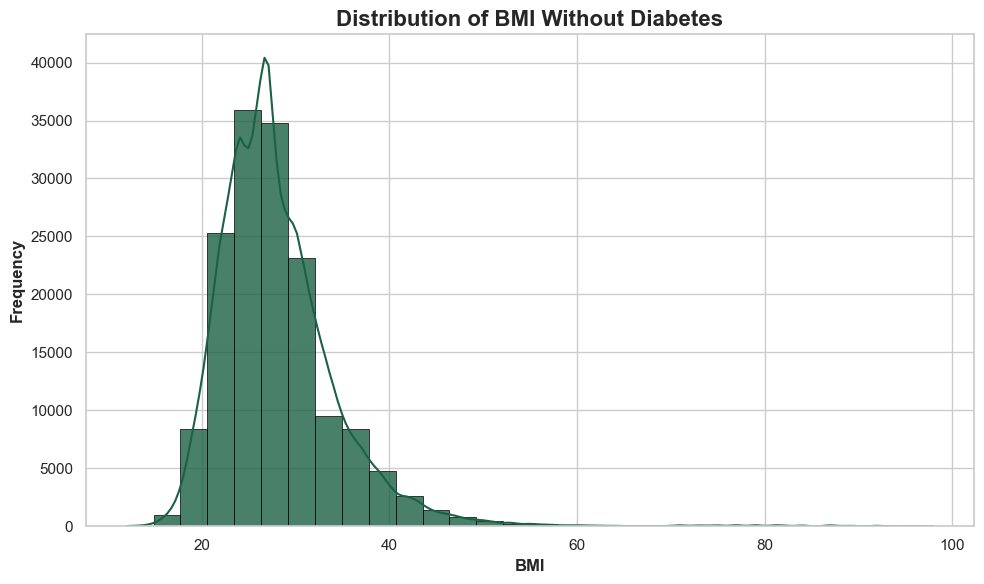

In [101]:
# Set a prettier style and palette
sns.set(style="whitegrid")
palette_color = sns.color_palette("cubehelix")[1]

plt.figure(figsize=(10, 6))
sns.histplot(
    train_df.loc[train_df['Diabetes'] == 0, 'BMI'],
    kde=True,
    bins=30,
    color=palette_color,
    edgecolor='black',
    linewidth=0.5,
    alpha=0.8
)

plt.title('Distribution of BMI Without Diabetes', fontweight='bold', fontsize=16)
plt.xlabel('BMI', fontweight='bold', fontsize=12)
plt.ylabel('Frequency', fontweight='bold', fontsize=12)
plt.tight_layout()
plt.show()

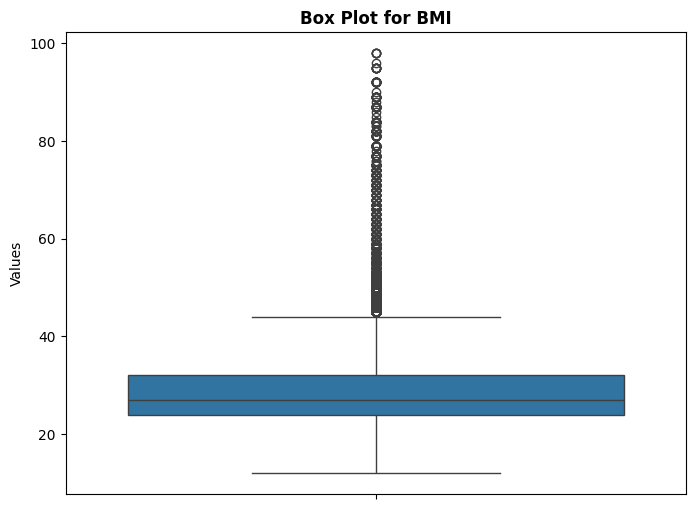

In [14]:
# Create box plots for BMI column
plt.figure(figsize=(8, 6))
sns.boxplot(data=train_df["BMI"])
plt.title('Box Plot for BMI', fontweight='bold')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [27]:
print(train_df["BMI"].max())
print(train_df["BMI"].min())
# the narural value is between 16 to 45

98.0
12.0


In [28]:
q1 = train_df['BMI'].quantile(0.25)
q3 = train_df['BMI'].quantile(0.75)
iqr = q3 - q1

# Define lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter the dataframe to remove outliers
train_df = train_df[(train_df['BMI'] >= lower_bound) & (train_df['BMI'] <= upper_bound)]

In [30]:
print(train_df["BMI"].max())
print(train_df["BMI"].min())
# the narural value is between 16 to 45

44.0
12.0


## Dimentionality Reduction

In [31]:

from scipy.stats import chi2_contingency

def chi2_test(df, target_column, alpha=0.05):

    results = []
    categorical_cols = df.columns.tolist()

    for col in categorical_cols:
        if col == target_column:
            continue

        # Create contingency table
        contingency_table = pd.crosstab(df[col], df[target_column])

        # Perform Chi-Square test
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        # Determine if the result is significant
        significant = "Reject H0 (Dependent)" if p < alpha else "Fail to Reject H0 (Independent)"

        # Store results
        results.append({
            'Feature': col,
            'Chi-Square': chi2,
            'p-value': p,
            'Significance': significant
        })

    return pd.DataFrame(results)

# Example usage:
# df = pd.read_csv("your_data.csv")
target_column = "Diabetes"  # Replace with your target column name
chi2_results = chi2_test(train_df, target_column)
print(chi2_results)

                 Feature    Chi-Square        p-value           Significance
0                 HighBP  11366.630937   0.000000e+00  Reject H0 (Dependent)
1               HighChol   6855.763781   0.000000e+00  Reject H0 (Dependent)
2              CholCheck    906.465472  3.857539e-199  Reject H0 (Dependent)
3                    BMI   8286.250136   0.000000e+00  Reject H0 (Dependent)
4                 Smoker    420.803926   1.631033e-93  Reject H0 (Dependent)
5                 Stroke   1832.722785   0.000000e+00  Reject H0 (Dependent)
6   HeartDiseaseorAttack   5191.563787   0.000000e+00  Reject H0 (Dependent)
7           PhysActivity   1642.176086   0.000000e+00  Reject H0 (Dependent)
8                 Fruits    115.897714   5.004540e-27  Reject H0 (Dependent)
9                Veggies    333.833569   1.405547e-74  Reject H0 (Dependent)
10     HvyAlcoholConsump    738.190255  1.483516e-162  Reject H0 (Dependent)
11         AnyHealthcare    129.480663   5.323255e-30  Reject H0 (Dependent)

In [32]:

def entropy(target):

    counts = target.value_counts()
    probabilities = counts / len(target)
    return -np.sum(probabilities * np.log2(probabilities + 1e-10))  # Avoid log(0)

def select_features_information_gain(X, y, k=None, threshold=None):
   
    target_entropy = entropy(y)
    ig_scores = {}
    
    # Calculate information gain for each feature
    for feature in X.columns:
        feature_entropy = 0.0
        for value in X[feature].unique():
            subset_mask = X[feature] == value
            subset_y = y[subset_mask]
            if len(subset_y) == 0:
                continue
            prob = len(subset_y) / len(X)
            feature_entropy += prob * entropy(subset_y)
        ig_scores[feature] = target_entropy - feature_entropy
        print(feature, ' -----> ',target_entropy - feature_entropy)
    
    # Sort features by information gain
    sorted_features = sorted(ig_scores.items(), key=lambda x: x[1], reverse=True)
    
    # Select features based on criteria
    if k is not None:
        selected_features = [feat for feat, _ in sorted_features[:k]]
    elif threshold is not None:
        selected_features = [feat for feat, score in sorted_features if score >= threshold]
    else:
        selected_features = [feat for feat, score in sorted_features if score > 0]
    
    # Combine selected features with the target column
    selected_df = pd.concat([X[selected_features], y], axis=1)
    
    return selected_df

In [33]:
selected_train_df=select_features_information_gain(train_df.drop('Diabetes',axis=1), train_df['Diabetes'], threshold=0.015)


HighBP  ----->  0.04615744385970433
HighChol  ----->  0.027321995968898283
CholCheck  ----->  0.005158493478405579
BMI  ----->  0.03245018890429485
Smoker  ----->  0.001673068031621372
Stroke  ----->  0.00591135384543795
HeartDiseaseorAttack  ----->  0.016867039931327765
PhysActivity  ----->  0.006179475481374097
Fruits  ----->  0.00045885025685199476
Veggies  ----->  0.0012805747861651673
HvyAlcoholConsump  ----->  0.0036347145288548877
AnyHealthcare  ----->  0.0005600186448124767
NoDocbcCost  ----->  0.0001936258056751683
GenHlth  ----->  0.054369718442204173
MentHlth  ----->  0.003036927911180709
PhysHlth  ----->  0.01552400471203852
DiffWalk  ----->  0.023871735634993785
Sex  ----->  0.0010332131335707428
Age  ----->  0.03166898440085708
Education  ----->  0.0073964023453581
Income  ----->  0.013627838992479435


In [34]:
selected_train_df.head()

,GenHlth,HighBP,BMI,Age,HighChol,DiffWalk,HeartDiseaseorAttack,PhysHlth,Diabetes
0,3.0,False,21.0,7.0,False,False,False,7.0,0.0
1,3.0,True,28.0,13.0,True,False,False,0.0,0.0
2,1.0,False,24.0,1.0,False,False,False,0.0,0.0
3,2.0,False,27.0,2.0,False,False,False,0.0,0.0
4,4.0,False,31.0,8.0,True,True,False,27.0,0.0


In [35]:
selected_train_df['Diabetes'].value_counts()

Diabetes
0.0    154529
1.0     26548
Name: count, dtype: int64

In [52]:
selected_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181077 entries, 0 to 202942
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   GenHlth               181077 non-null  float64
 1   HighBP                181077 non-null  bool   
 2   BMI                   181077 non-null  float64
 3   Age                   181077 non-null  float64
 4   HighChol              181077 non-null  bool   
 5   DiffWalk              181077 non-null  bool   
 6   HeartDiseaseorAttack  181077 non-null  bool   
 7   PhysHlth              181077 non-null  float64
 8   Diabetes              181077 non-null  float64
dtypes: bool(4), float64(5)
memory usage: 13.0 MB


## overview
if we oversample True to match false total data will be around 309,058

if we Undersample False to match True total data will be around 53,096


## training budget analysis:

Bechamel tray from family -> 0 EGP

About a kilo of Hijazi from a relatives -> 0 EGP

Cash flow for this project-> 0 EGP

Total budget ----> 0 EGP

## Deision:

under sampling to reduce traing time and choose a fast kernal like rpf for this data

In [24]:
X=selected_train_df.drop('Diabetes',axis=1)
y=selected_train_df['Diabetes']


from imblearn.under_sampling import RandomUnderSampler
undersampler= RandomUnderSampler(sampling_strategy='majority')
X_resampled,y_resampled=undersampler.fit_resample(X,y)


In [28]:
selected_train_df.head()

,GenHlth,HighBP,BMI,Age,HighChol,DiffWalk,HeartDiseaseorAttack,PhysHlth,Diabetes
0,3.0,False,21.0,7.0,False,False,False,7.0,0.0
1,3.0,True,28.0,13.0,True,False,False,0.0,0.0
2,1.0,False,24.0,1.0,False,False,False,0.0,0.0
3,2.0,False,27.0,2.0,False,False,False,0.0,0.0
4,4.0,False,31.0,8.0,True,True,False,27.0,0.0


In [25]:
y_resampled.value_counts()

Diabetes
0.0    26548
1.0    26548
Name: count, dtype: int64

# gridSearch in the planced sample

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=101)

In [263]:
from sklearn.model_selection import  GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC

pipeline = Pipeline([
    ('pca', PCA(random_state=42)),  
    ('svc', SVC(random_state=42))   
])


param_grid = {
    'pca__n_components': [3, 5, 4, 6,8,None],  
    'svc__C': [0.1, 5, 10],                    
    'svc__kernel': ['rbf'],   
    'svc__gamma': ['scale', 'auto',1, 5,8]   
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='accuracy',
    cv=2,  
    n_jobs=-1 
)


grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)



Best Parameters: {'pca__n_components': 8, 'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Best CV Accuracy: 0.7297602188911314


Best Parameters: {'pca__n_components': 8, 'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}

Best CV Accuracy: 0.7297602188911314

In [264]:
from joblib import dump
best_model = grid_search.best_estimator_
dump(best_model, 'best_model.joblib')

['best_model.joblib']

In [265]:
from sklearn.metrics import classification_report,confusion_matrix
from joblib import load
loaded_pipeline = load('best_model.joblib')
y_pred = loaded_pipeline.predict(X_val)
print('classification_report: \n \n')
print(classification_report(y_val,y_pred))

classification_report: 
 

              precision    recall  f1-score   support

         0.0       0.76      0.68      0.72      8016
         1.0       0.71      0.79      0.74      7913

    accuracy                           0.73     15929
   macro avg       0.73      0.73      0.73     15929
weighted avg       0.73      0.73      0.73     15929



In [266]:
from sklearn.model_selection import  GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.svm import SVC

pipeline = Pipeline([
    ('lda', LDA(random_state=42)),  
    ('svc', SVC(random_state=42))   
])


param_grid = {
    'lda__n_components': [3, 5, 4, 6,8,None],  
    'svc__C': [0.1, 5, 10],                    
    'svc__kernel': ['rbf'],   
    'svc__gamma': ['scale', 'auto',1, 5,8]   
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='accuracy',
    cv=2,  
    n_jobs=-1 
)


grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
30 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python311\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python311\Lib\site-packages\sklearn\pipeline.py", line 471, in fit
    Xt = self._fit(X, y, routed_params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^

Best Parameters: {'lda__n_components': 8, 'svc__C': 10, 'svc__gamma': 8, 'svc__kernel': 'rbf'}
Best CV Accuracy: 0.6842629566518346


Best Parameters: {'lda__n_components': 8, 'svc__C': 10, 'svc__gamma': 8, 'svc__kernel': 'rbf'}

Best CV Accuracy: 0.6842629566518346

In [267]:
from joblib import dump
best_model = grid_search.best_estimator_
dump(best_model, 'best_lda_model.joblib')

['best_lda_model.joblib']

In [268]:
from sklearn.metrics import classification_report,confusion_matrix
from joblib import load
loaded_pipeline = load('best_lda_model.joblib')
y_pred = loaded_pipeline.predict(X_val)
print('classification_report: \n \n')
print(classification_report(y_val,y_pred))

classification_report: 
 

              precision    recall  f1-score   support

         0.0       0.76      0.56      0.65      8016
         1.0       0.65      0.82      0.72      7913

    accuracy                           0.69     15929
   macro avg       0.70      0.69      0.68     15929
weighted avg       0.70      0.69      0.68     15929



In [285]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

class SelectColumns(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[['GenHlth', 'HighBP', 'BMI', 'Age', 'HighChol',
                  'DiffWalk', 'HeartDiseaseorAttack', 'PhysHlth']]

class ChangeDataTypes(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
            return self
    def transform(self, X):
        X = X.copy()
        X['HighBP'] = X['HighBP'].astype(bool)
        X['HighChol'] = X['HighChol'].astype(bool)
        X['DiffWalk'] = X['DiffWalk'].astype(bool)
        X['HeartDiseaseorAttack'] = X['HeartDiseaseorAttack'].astype(bool)
        return X


class ClipBMI(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
            return self
    def transform(self, X):
        X = X.copy()
        X['BMI'] = X['BMI'].clip(lower=12,upper=44)
        return X

preprocessing_pipeline= Pipeline([
     ('column_selector', SelectColumns() ),
     ('type_changer', ChangeDataTypes() ),
     ('BMI_Cliper', ClipBMI() )
])





In [286]:
test_df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
202944,0.0,0.0,1.0,1.0,84.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,4.0,1.0,0.0,0.0,2.0,6.0,5.0
202945,0.0,0.0,0.0,1.0,29.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,2.0,0.0,1.0,0.0,1.0,7.0,6.0,8.0
202946,1.0,0.0,1.0,1.0,30.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,7.0,5.0,7.0
202947,1.0,1.0,0.0,1.0,44.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,10.0,6.0,7.0
202948,0.0,1.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0


In [287]:
from joblib import load
loaded_pipeline = load('best_model.joblib')

In [289]:
X_test =test_df.drop('Diabetes_binary',axis=1)
y_test=test_df['Diabetes_binary']
processed_data=preprocessing_pipeline.fit_transform(X_test)
y_pred=loaded_pipeline.predict(processed_data)
print('classification_report: \n \n')
print(classification_report(y_test,y_pred))

classification_report: 
 

              precision    recall  f1-score   support

         0.0       0.96      0.69      0.80     43681
         1.0       0.29      0.80      0.43      7055

    accuracy                           0.70     50736
   macro avg       0.62      0.74      0.62     50736
weighted avg       0.86      0.70      0.75     50736

